In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

[300.0, 750.0]


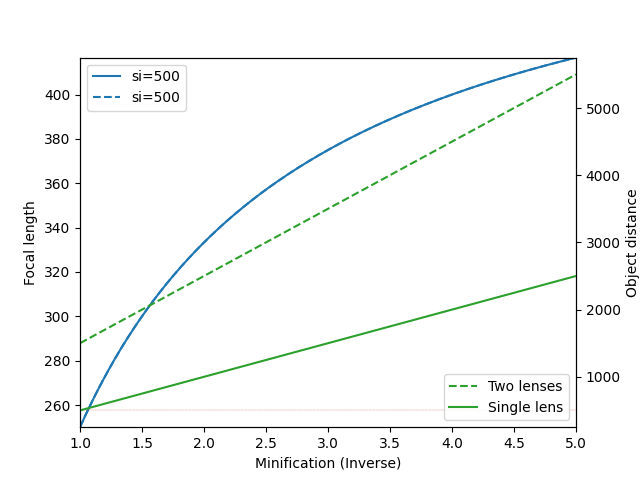

In [12]:
def object_dist(x, si):
    M = - 1 / x
    so = - si / M
    f = si / (-M+1)
    return [f, so]

x = np.linspace(1, 5, 1000)
nr = len(x)
si = 500
L_two = 2 * 500 * x  + 500
si2 = 500
so_lim = 500
[f, so] = object_dist(x, si)
f2 = object_dist(x, si2)[0]
ind_lim = np.argmin(np.absolute(so - so_lim))
x_lim = x[ind_lim]
f_lim = f[ind_lim]
ylim = [np.amin((f, f2)), np.amax((f, f2))]
xlim = [np.amin(x), np.amax(x)]
fig, ax = plt.subplots()
secax = ax.twinx()
ax.plot(x, f, label='si=%d' % si)
secax.plot(x, L_two, label='Two lenses', c='tab:green', ls='--')
secax.hlines(so_lim, x_lim, xlim[1], color='tab:red', ls='--', lw=0.2)
ax.vlines(x_lim, ylim[0], f_lim, color='tab:red', lw=0.2, ls='--')
ax.hlines(f_lim, xlim[0], x_lim, color='tab:red',ls='--', lw=0.2)
ax.plot(x, f2, c='tab:blue', ls='--', label='si=%d' % si2)
secax.plot(x, so, c='tab:green', label='Single lens')
ax.set_xlabel('Minification (Inverse)')
ax.set_ylabel('Focal length')
secax.set_ylabel('Object distance')
ax.legend(loc=2)
secax.legend(loc=4)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
print(object_dist(1.5, 500))

In [ ]:
def object_one(f1, si2, d, M):
    return f1*(si2+d*M) / (M*(d-f1))

def focal_two(f1, si2, d, so1):
    return si2*(d-so1*f1/(so1-f1) / (d-so1*f1/(so1-f1)+si2))

def total_f2(f1, si2, d, M):
    return focal_two(f1, si2, d, object_one(f1, si2, d, M))

si2 = 500
d=0
f1 = 1500
x = 2
M = -1 / x
f2 = total_f2(f1, si2, d, M)

so1 = object_one(f1, si2, d, M)
l = d + so1
print(f2, l, so1)
# l_lim = 1500
# ind_lim = np.argmin(np.absolute(l - l_lim))
# x_lim = x[ind_lim]
# f2_lim = f2[ind_lim]
# ylim = [np.nanmin(f2[f2 != -np.inf]), np.nanmax(f2[f2 != np.inf])]
# xlim = [np.amin(x), np.amax(x)]

# fig, ax = plt.subplots()
# secax = ax.twinx()
# ax.scatter(x, f2, label='F1=%d' % f1)
# secax.scatter(x, l, c='tab:green')
# # secax.hlines(l_lim, x_lim, xlim[1], color='tab:red', ls='--', lw=0.2)
# # ax.vlines(x_lim, ylim[0], f2_lim, color='tab:red', lw=0.2, ls='--')
# # ax.hlines(f2_lim, xlim[0], x_lim, color='tab:red',ls='--', lw=0.2)
# ax.set_xlabel('Minification (Inverse)')
# ax.set_ylabel('F2')
# secax.set_ylabel('d+so1 (d=%d)' % d)
# ax.legend()
# ax.set_ylim(0, 2000)
# ax.set_xlim([0, 5])
# secax.set_ylim(0, 10000)


In [ ]:
f2 = 500
x = np.linspace(1, 5)
M = - 1 / x
f1 = -f2 / M
l = 2*f1 + f2
fig, ax = plt.subplots()
ax.plot(x, f1)
secax = ax.twinx()
secax.plot(x, l, c='tab:orange', ls='--')


In [ ]:
def focal_length(so, si):
    return si * so / (si + so)

def object_dist(f, si):
    if si == np.inf:
        return f
    elif si - f == 0:
        return np.inf
    else:
        return f * si / (si - f)

def image_dist(f, so):
    if so == np.inf:
        return f
    elif so - f == 0:
        return np.inf
    else:
        return f * so / (so - f)


f1 = 50
f2 = -50
feff = f1*f2 / (f1+f2)
print(feff)
so1 = feff
si1 = image_dist(f1, so1)
print(si1)

d = 0
so2 = d - si1
print(so2)
si2 = image_dist(f2, so2)
print(si2)
d2 = 0
so3 = d2 - si2
f3 = 400
si3 = image_dist(f3, so3)
print(si3)
print(-si3 / so1)


# f3 = 400
# si3 = 500
# so3 = object_dist(f3, si3)
# print(so3)


In [6]:
def image_dist2(f1, f2, so1, d):
    denom1 = (so1 - f1) 
    if denom1 != 0:
        denom2 = (d - f2 - so1*f1 / (so1 - f1))
        if denom2 != 0:
            return (f2*d - f2*so1*f1 / (so1 - f1)) / (d - f2 - so1*f1 / (so1 - f1))
        else:
            return np.inf
    else:
        return f2

def mag2(f1, so1, si2, d):
    return f1*si2 / (d*(so1 - f1) - so1*f1)

def frontfocal(f1, f2, d):
    return (f1*(d - f2)) / (d - (f1 + f2))

def backfocal(f1, f2, d):
    return (f2*(d - f1)) / (d - (f1 + f2))

def image_dist(f, so):
    if so == np.inf:
        return f
    else:
        return f*so / (so - f)

def mag(so, si):
    return - si / so

f1 = 150
d = 10
f2 = 30
so1 = 500
ffl = frontfocal(f1, f2, d)
bfl = backfocal(f1, f2, d)
print('ffl=%.1f, bfl=%.1f' % (ffl, bfl))

si2 = image_dist2(f1, f2, so1, d)
print('si2=%.f' % si2)
M = mag(so1, si2)
print('M=%.1f' % M)


f3 = 1000
d3 = 0
f4 = -50
ffl = frontfocal(f3, f4, d3)
bfl = backfocal(f3, f4, d3)
print('ffl=%.1f, bfl=%.1f' % (ffl, bfl))
so3 = np.inf
si4 = image_dist2(f3, f4, so3, d3)
print('si2=%.f' % si4)
# f3 = 500
# d2 = bfl + f3
# print('d2=%.f' % d2)
# so3 = np.inf
# si3 = image_dist(f3, so3)
# print('si3=%.f' % si3)


ffl=17.6, bfl=24.7
si2=26
M=-0.1
ffl=-52.6, bfl=-52.6
si2=nan


In [39]:
0.075/14.14 * 100

0.5304101838755303

In [33]:
half_field = 8.089
full_field = 16.199
diff = full_field - 2*half_field
print(diff*1e3)
print(diff / 14.14*100)

21.000000000000796
0.14851485148515414


In [6]:
f = 500

si = 500
# so = f * si / (si - f)
so = 1 / (1/f - 1/si)
print(so)
print(np.arctan(10/so)*180/np.pi)
print(-si/so)

749.9999999999999
0.7638984609299951
-0.6666666666666667


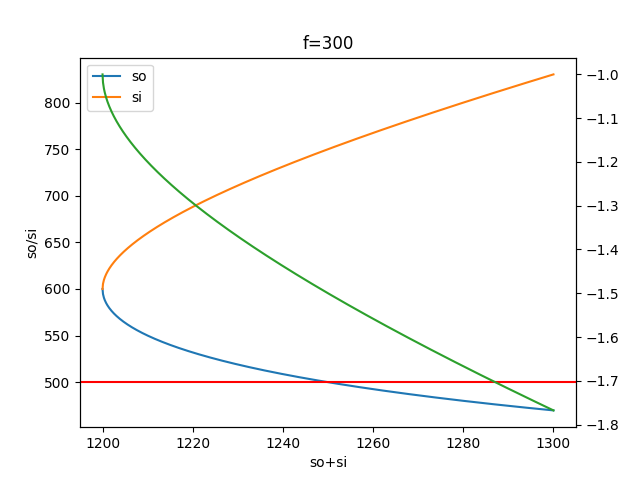

In [12]:
f = 300
x = np.linspace(1200, 1300, 1000)
si = x/2 + np.sqrt((x/2)**2 - f*x)
so = x/2 - np.sqrt((x/2)**2 - f*x)
M = - si/so
fig, ax = plt.subplots()
secax = ax.twinx()
secax.plot(x, M, c='tab:green')
ax.plot(x, so, label='so')
ax.plot(x, si, label='si')
ax.legend()
ax.set_xlabel('so+si')
ax.set_ylabel('so/si')
ax.set_title('f=300')
ax.axhline(500, 0, 1, c='r')

In [3]:
filename = 'LT295_400pxl_design/KID_id_board_400.npy'
ids = np.load(filename)

2
